In [1]:
import pandas as pd

# Load the dataset
file_path = 'synthetic_power_load_data_realistic.csv'
data = pd.read_csv(file_path)

# Display basic information and first few rows of the dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          26304 non-null  object 
 1   Load (kW)         26304 non-null  float64
 2   Temperature (°C)  26304 non-null  float64
 3   Humidity (%)      26304 non-null  float64
 4   Wind Speed (m/s)  26304 non-null  float64
 5   Day of Week       26304 non-null  int64  
 6   Hour              26304 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ MB


,Datetime,Load (kW),Temperature (°C),Humidity (%),Wind Speed (m/s),Day of Week,Hour
0,2022-01-01 00:00:00,57.827838,9.835973,44.926342,5.882430,5,0
1,2022-01-01 01:00:00,55.947041,19.660266,48.950093,1.695450,5,1
2,2022-01-01 02:00:00,61.082710,17.135231,66.311110,0.745296,5,2
3,2022-01-01 03:00:00,66.494950,15.005380,49.209058,0.209786,5,3
4,2022-01-01 04:00:00,58.503627,16.012039,49.907486,4.130136,5,4


C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\yunusyosaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   
Mean Squared Error (MSE): 32.94
Root Mean Squared Error (RMSE): 5.74
Mean Absolute Error (MAE): 4.59


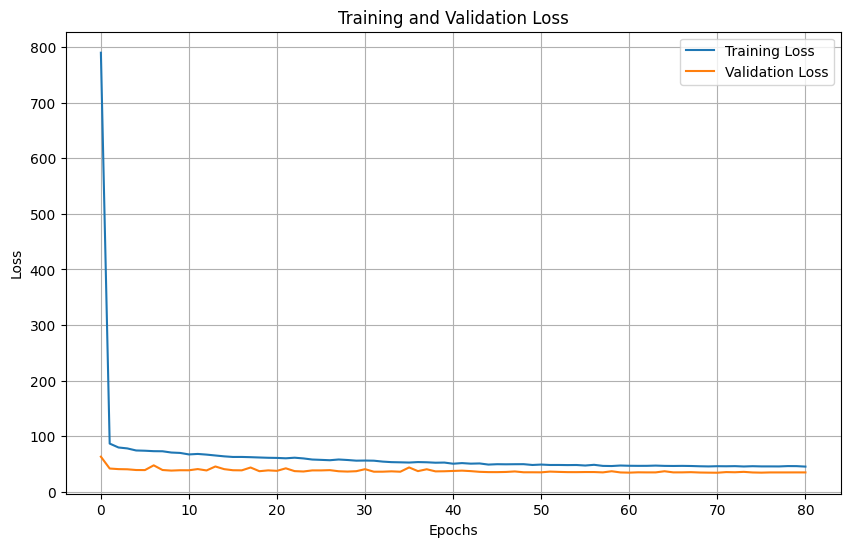

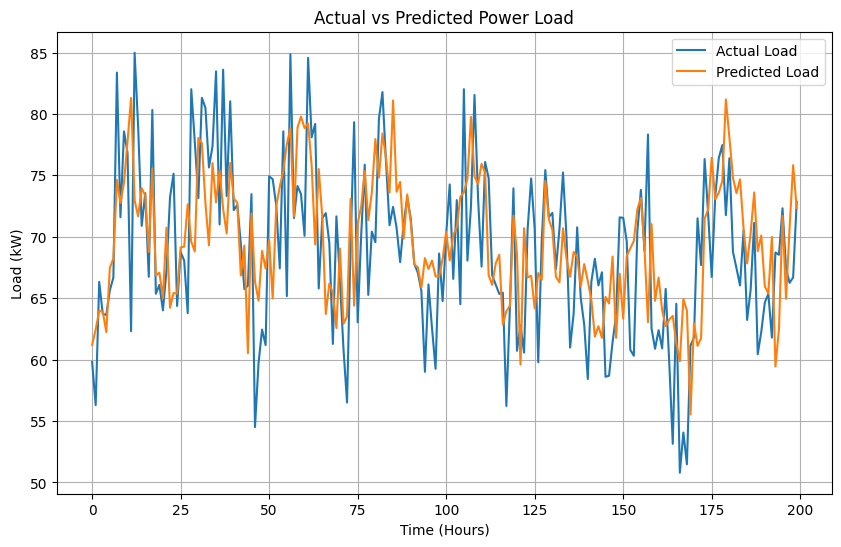

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import AdamW

# Enhanced FNN Model with Batch Normalization and AdamW optimizer
model = Sequential([
    Dense(256, input_shape=(X_train_scaled.shape[1],), kernel_regularizer='l2'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(128, kernel_regularizer='l2'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(64, kernel_regularizer='l2'),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(32, kernel_regularizer='l2'),
    LeakyReLU(alpha=0.01),
    Dense(1)
])

# Compile the model with AdamW optimizer and learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer=AdamW(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model with more epochs
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler, early_stopping], verbose=0)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted load
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:200], label='Actual Load')
plt.plot(y_pred[:200], label='Predicted Load')
plt.xlabel('Time (Hours)')
plt.ylabel('Load (kW)')
plt.title('Actual vs Predicted Power Load')
plt.legend()
plt.grid(True)
plt.show()

## Plot actual vs predicted load
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:200], label='Actual Load')
plt.plot(y_pred[:200], label='Predicted Load')
plt.xlabel('Time (Hours)')
plt.ylabel('Load (kW)')
plt.title('Actual vs Predicted Power Load')
plt.legend()
plt.grid(True)
plt.show()